In [829]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [830]:
df = pd.read_csv("Most-Recent-Cohorts-Institution.csv",low_memory=False)
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP8_NOPELL_FIRSTTIME,OMENRUP_NOPELL_FIRSTTIME,OMENRYP_NOPELL_NOTFIRSTTIME,OMENRAP_NOPELL_NOTFIRSTTIME,OMAWDP8_NOPELL_NOTFIRSTTIME,OMENRUP_NOPELL_NOTFIRSTTIME,OMACHT8_NOPELL_ALL,OMACHT8_NOPELL_FIRSTTIME,OMACHT8_NOPELL_NOTFIRSTTIME,ADDR
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3187,0.2709,0.0128,0.2949,0.4744,0.2179,329.0,251.0,78.0,4900 Meridian Street
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,0.6937,0.0660,0.0111,0.2636,0.5136,0.2117,2358.0,1182.0,1176.0,Administration Bldg Suite 1070
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,0.0000,0.5000,0.0000,0.3333,0.4583,0.2083,26.0,2.0,24.0,1200 Taylor Rd
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,0.6471,0.0941,0.0082,0.2647,0.5948,0.1324,1122.0,510.0,612.0,301 Sparkman Dr
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.4381,0.2167,0.0000,0.1444,0.3667,0.4889,510.0,420.0,90.0,915 S Jackson Street


### Data Exploration
#### Univariate
Let's look at some info about the df. 

In [831]:
df.shape

(6543, 3232)

In [832]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6543 entries, 0 to 6542
Columns: 3232 entries, UNITID to ADDR
dtypes: float64(841), int64(15), object(2376)
memory usage: 161.3+ MB


It is a big dataframe. There are over 6,000 schools represented, and over 3,000 columns of data for each school. Let's start by looking at some of the most interesting variables, starting with the predominant degree granted:
>0	Not classified
1	Predominantly certificate-degree granting
2	Predominantly associate's-degree granting
3	Predominantly bachelor's-degree granting
4	Entirely graduate-degree granting


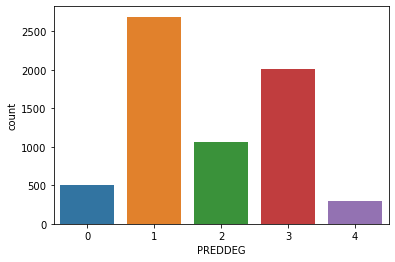

In [833]:
sns.countplot(data=df, x='PREDDEG');



Here's the highest degree awarded:
0	Non-degree-granting
1	Certificate degree
2	Associate degree
3	Bachelor's degree
4	Graduate degree

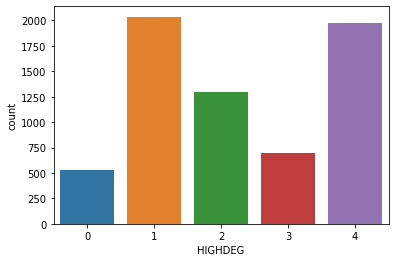

In [834]:
sns.countplot(data=df, x='HIGHDEG');

Type of institution:
>1	Public
>2	Private nonprofit
3	Private for-profit



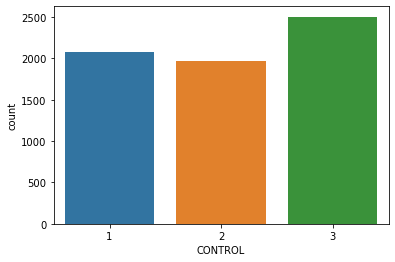

In [835]:
sns.countplot(data=df, x='CONTROL');


Locale: 
>11	City: Large (population of 250,000 or more)
12	City: Midsize (population of at least 100,000 but less than 250,000)
13	City: Small (population less than 100,000)
21	Suburb: Large (outside principal city, in urbanized area with population of 250,000 or more)
22	Suburb: Midsize (outside principal city, in urbanized area with population of at least 100,000 but less than 250,000)
23	Suburb: Small (outside principal city, in urbanized area with population less than 100,000)
31	Town: Fringe (in urban cluster up to 10 miles from an urbanized area)
32	Town: Distant (in urban cluster more than 10 miles and up to 35 miles from an urbanized area)
33	Town: Remote (in urban cluster more than 35 miles from an urbanized area)
41	Rural: Fringe (rural territory up to 5 miles from an urbanized area or up to 2.5 miles from an urban cluster)
42	Rural: Distant (rural territory more than 5 miles but up to 25 miles from an urbanized area or more than 2.5 and up to 10 miles from an urban cluster)
43	Rural: Remote (rural territory more than 25 miles from an urbanized area and more than 10 miles from an urban cluster)



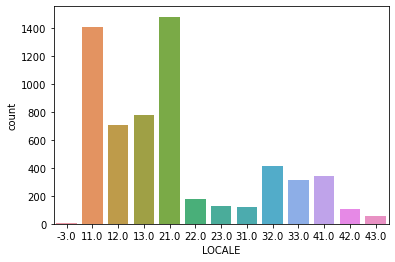

In [836]:
sns.countplot(data=df, x='LOCALE');

Carnegie Classification:
>-2	Not applicable
0	(Not classified)
1	Associate's Colleges: High Transfer-High Traditional
2	Associate's Colleges: High Transfer-Mixed Traditional/Nontraditional
3	Associate's Colleges: High Transfer-High Nontraditional
4	Associate's Colleges: Mixed Transfer/Career & Technical-High Traditional
5	Associate's Colleges: Mixed Transfer/Career & Technical-Mixed Traditional/Nontraditional
6	Associate's Colleges: Mixed Transfer/Career & Technical-High Nontraditional
7	Associate's Colleges: High Career & Technical-High Traditional
8	Associate's Colleges: High Career & Technical-Mixed Traditional/Nontraditional
9	Associate's Colleges: High Career & Technical-High Nontraditional
10	Special Focus Two-Year: Health Professions
11	Special Focus Two-Year: Technical Professions
12	Special Focus Two-Year: Arts & Design
13	Special Focus Two-Year: Other Fields
14	Baccalaureate/Associate's Colleges: Associate's Dominant
15	Doctoral Universities: Very High Research Activity
16	Doctoral Universities: High Research Activity
17	Doctoral/Professional Universities
18	Master's Colleges & Universities: Larger Programs
19	Master's Colleges & Universities: Medium Programs
20	Master's Colleges & Universities: Small Programs
21	Baccalaureate Colleges: Arts & Sciences Focus
22	Baccalaureate Colleges: Diverse Fields
23	Baccalaureate/Associate's Colleges: Mixed Baccalaureate/Associate's
24	Special Focus Four-Year: Faith-Related Institutions
25	Special Focus Four-Year: Medical Schools & Centers
26	Special Focus Four-Year: Other Health Professions Schools
27	Special Focus Four-Year: Research Institution
28	Special Focus Four-Year: Engineering and Other Technology-Related Schools
29	Special Focus Four-Year: Business & Management Schools
30	Special Focus Four-Year: Arts, Music & Design Schools
31	Special Focus Four-Year: Law Schools
32	Special Focus Four-Year: Other Special Focus Institutions
33	Tribal Colleges


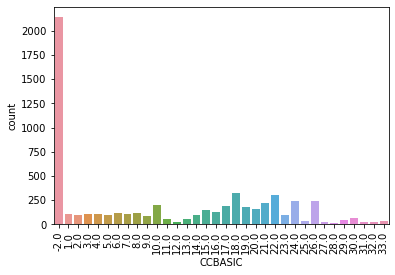

In [837]:
sns.countplot(data=df, x='CCBASIC')
plt.xticks(rotation=90);


Carnegie size classification: 
>-2	Not applicable
0	(Not classified)
1	Two-year, very small
2	Two-year, small
3	Two-year, medium
4	Two-year, large
5	Two-year, very large
6	Four-year, very small, primarily nonresidential
7	Four-year, very small, primarily residential
8	Four-year, very small, highly residential
9	Four-year, small, primarily nonresidential
10	Four-year, small, primarily residential
11	Four-year, small, highly residential
12	Four-year, medium, primarily nonresidential
13	Four-year, medium, primarily residential
14	Four-year, medium, highly residential
15	Four-year, large, primarily nonresidential
16	Four-year, large, primarily residential
17	Four-year, large, highly residential
18	Exclusively graduate/professional


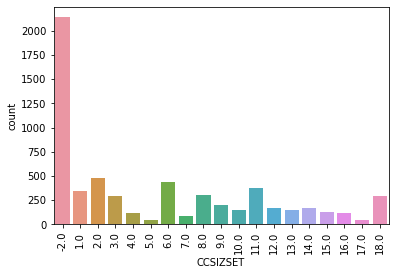

In [838]:
sns.countplot(data=df, x='CCSIZSET')
plt.xticks(rotation=90);



Let's look at the number of HBCUs:

<AxesSubplot:xlabel='HBCU', ylabel='count'>

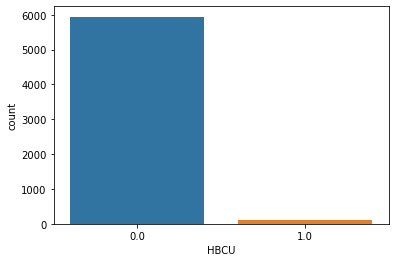

In [839]:
sns.countplot(data=df, x='HBCU')

Now, admissions rate. Conveniently, anything which ranges from 0 to 1 will be plotted effectively with just the standard histogram that will sort this into 10 bins. 

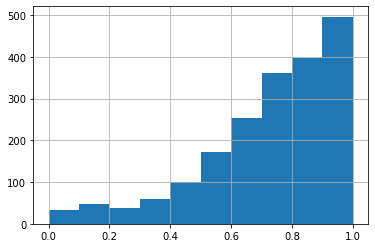

In [840]:
df['ADM_RATE'].hist();

Average SAT scores are more complicated, so I'll set the bin size manually. 

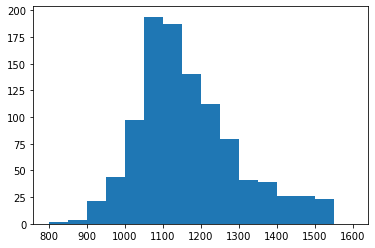

In [841]:
bins = np.arange(800, 1650, 50)
plt.hist(data=df, x='SAT_AVG', bins=bins);


Here's cost for attendance for one year at academic year institutions

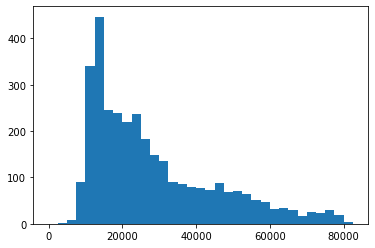

In [842]:
bins = np.arange(0, 85000, 2500)
plt.hist(data=df, x='COSTT4_A', bins=bins);

These are the completion rates for 4 year institutions, pooled across two years

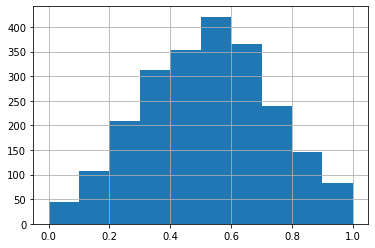

In [843]:
df['C150_4_POOLED'].hist();

Here it is for schools that aren't 4 year institutions. 

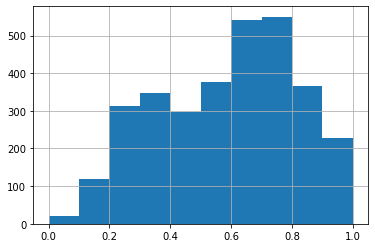

In [844]:
df['C150_L4_POOLED'].hist();

As a former academic, I was interested in the average faculty salary. These represent salaries per month, not per year! 

In [845]:
df['AVGFACSAL'].median()

6898.0

In [846]:
df['AVGFACSAL'].max()

21720.0

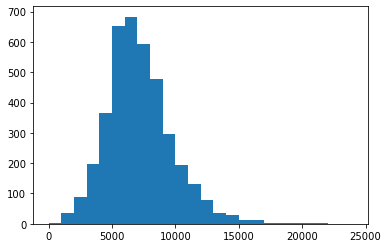

In [847]:
bins = np.arange(0, 25000, 1000)
plt.hist(data=df, x='AVGFACSAL', bins=bins);

Now let's look at the percent of full time faculty 

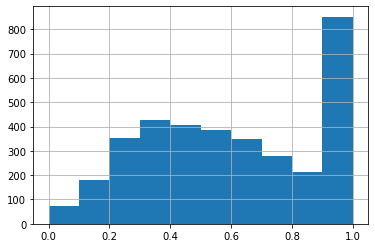

In [848]:
df['PFTFAC'].hist();

Next, let's look at the percent of students with federal loans.

<AxesSubplot:>

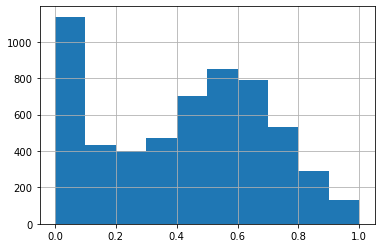

In [849]:
df['PCTFLOAN'].hist()


Next is percent with Pell grants

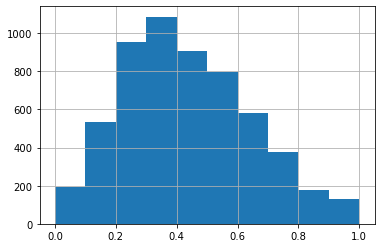

In [850]:
df["PCTPELL"].hist();

Now, we can check out the median earnings ten years after graduation. 

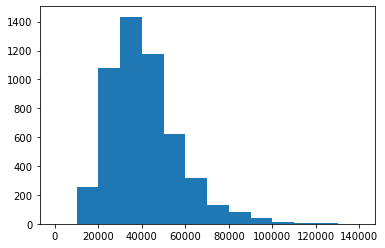

In [851]:
bins = np.arange(0, 150000, 10000)
plt.hist(data=df, x='MD_EARN_WNE_P10', bins=bins);

Here it is for just women 

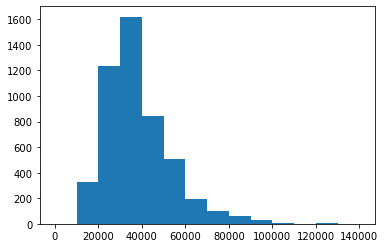

In [852]:
bins = np.arange(0, 150000, 10000)
plt.hist(data=df, x='MD_EARN_WNE_MALE0_P10', bins=bins);

And just men

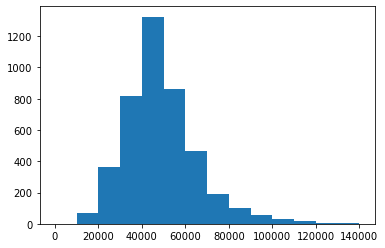

In [853]:
bins = np.arange(0, 150000, 10000)
plt.hist(data=df, x='MD_EARN_WNE_MALE1_P10', bins=bins);

This shows the percent of men in a given school. 

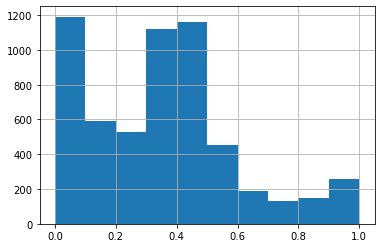

In [854]:
df['UGDS_MEN'].hist();

Here is the first-time, full-time student retention rate at four-year institutions

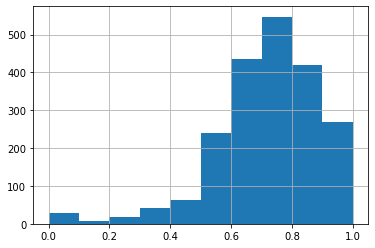

In [855]:
df['RET_FT4'].hist();

And for less than four year institutions

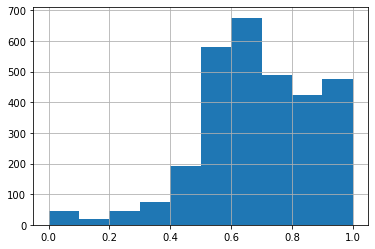

In [856]:
df['RET_FTL4'].hist();

#### Bivariate relationships 

Let's look at some bivariate relationships between the variables. First, I'll look at cost of attendance vs graduation rates for four year schools. 

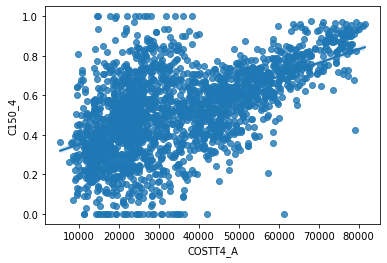

In [857]:
sns.regplot(data=df, x='COSTT4_A', y='C150_4');


It looks like there is some relationship between cost and graduation rates; schools with higher tuition seem to have higher grduation rates. 

Next, let's look at cost and retention at four year schools. 

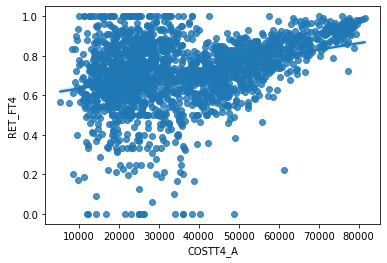

In [858]:
sns.regplot(data=df, x='COSTT4_A', y='RET_FT4');

Again, it looks like a positive relationship: as tuition increases, so do tuition rates. 
Now let's look at cost of tuition against admissions rates. 

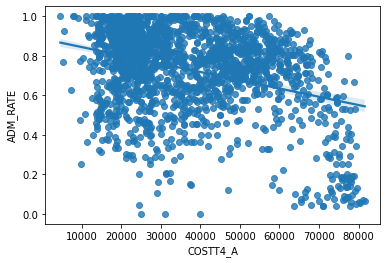

In [859]:
sns.regplot(data=df, x='COSTT4_A', y='ADM_RATE');

There is a slight negative trend, but mostly, there is not a strong relationship. 

Instead, let's look at SAT averages and admissions rates. 

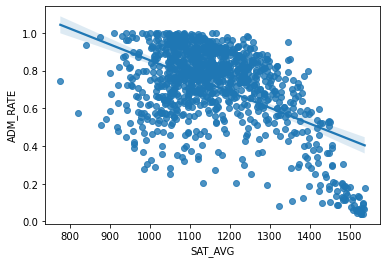

In [860]:
sns.regplot(data=df, x='SAT_AVG', y='ADM_RATE');

Here, the trend is much clearer; schools with lower admissions rates have students with higher average scores, since those schools are more competitive.

Now let's look at SAT averges and graduation rates. 

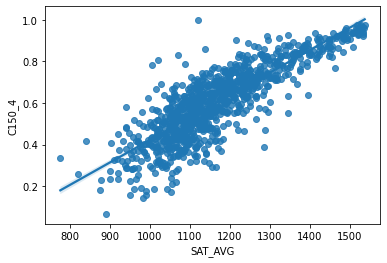

In [861]:
sns.regplot(data=df, x='SAT_AVG', y='C150_4');

The ETS insists that SAT is a good predictor of college success, and it looks like there is a clear, strong, positive relationship here: Students admitted with higher SAT scores are more likely to graduate. 

Now, let's see retention vs graduation rates. 

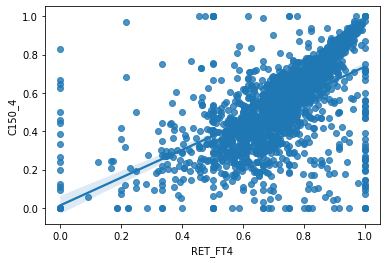

In [862]:
sns.regplot(data=df, x='RET_FT4', y='C150_4');

There are some interesting things here that point to some potential issues with the data; the schools represented along the edges are somewhat strange. For example, on the left edge, there are schools where the retention rate is 0, but the graduation rate is above 0! How can students graduate if they're not retained year to year? (Each of those rates are for four year institutions). Bu generally, higher retention rates mean higher graduation rates. 

There were some clear differences between median wages after 10 years by gender; let's get a better look at the comparison. 

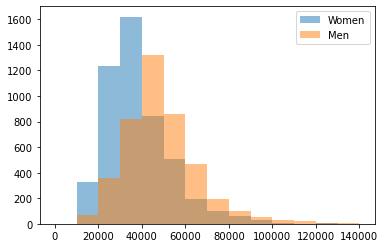

In [863]:
bins = np.arange(0, 150000, 10000)

plt.hist(data=df, x='MD_EARN_WNE_MALE0_P10', bins=bins, alpha=0.5, label='Women');
plt.hist(data=df, x='MD_EARN_WNE_MALE1_P10', bins=bins, alpha=0.5, label='Men');
plt.legend();

Both are unimodal, but the one for women has a lower median. The histogram for men has a longer right tail. 
Now let's look at graduation rates against median earnings after 10 years. 

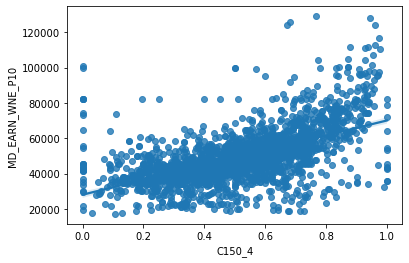

In [864]:
sns.regplot(data=df,x='C150_4',y='MD_EARN_WNE_P10');

There is a general trend towards higher graduation rates corresponding to higher median future earnings. 

How about the relationship between percent of students with federal loans and graduation rates? 

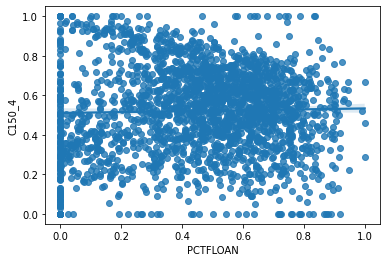

In [865]:
sns.regplot(data=df, x='PCTFLOAN', y='C150_4');

There is no clear relationship. What about Pell grants specifically? 

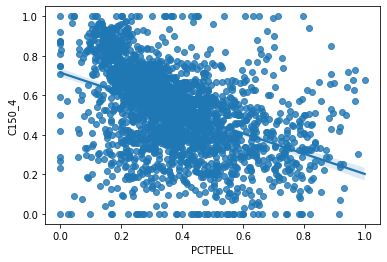

In [866]:
sns.regplot(data=df, x='PCTPELL', y='C150_4');

A slight negative relationship. 

I'm going to make a categorical variable for control (ie, public, private nonprofit, or private for profit) to make some comparisons. First, let's look at federal loans and Pell grants. 

In [867]:
df_select = df[['SAT_AVG','ADM_RATE','CONTROL',"C150_4",'MD_EARN_WNE_P10','COSTT4_A','PCTPELL','PCTFLOAN']].copy()
df_select.head()
mapping = {1: 'Public', 2: 'Private nonprofit', 3: 'Private for profit'}
df_select['CONTROL'] = df_select['CONTROL'].map(mapping)

classes = ['Public','Private nonprofit', 'Private for profit']
typeclasses = pd.CategoricalDtype(ordered=True, categories=classes)


df_select['CONTROL'] = df_select['CONTROL'].astype(typeclasses);
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6543 entries, 0 to 6542
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   SAT_AVG          1036 non-null   float64 
 1   ADM_RATE         1957 non-null   float64 
 2   CONTROL          6543 non-null   category
 3   C150_4           2263 non-null   float64 
 4   MD_EARN_WNE_P10  5165 non-null   float64 
 5   COSTT4_A         3303 non-null   float64 
 6   PCTPELL          5738 non-null   float64 
 7   PCTFLOAN         5738 non-null   float64 
dtypes: category(1), float64(7)
memory usage: 364.5 KB


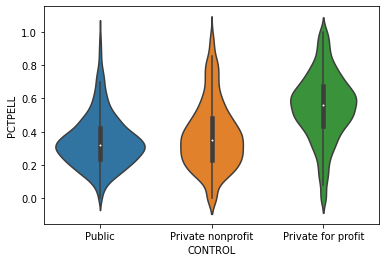

In [868]:
sns.violinplot(data=df_select, x='CONTROL', y='PCTPELL');

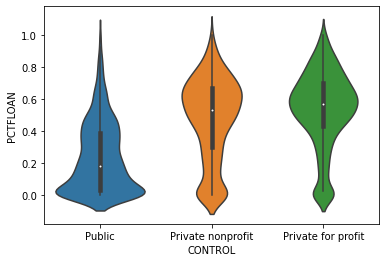

In [869]:
sns.violinplot(data=df_select, x='CONTROL', y='PCTFLOAN');

Pell grants and federal loans are more common at private for profit institutions; federal loans are similarly common at private not for profit schools. 

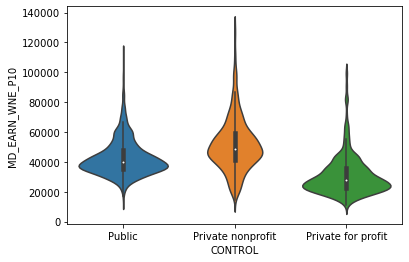

In [870]:
sns.violinplot(data=df_select, x='CONTROL', y='MD_EARN_WNE_P10');

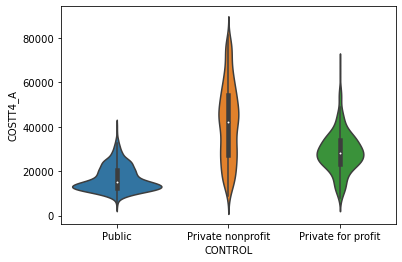

In [871]:
sns.violinplot(data=df_select, x='CONTROL', y='COSTT4_A');

Public schools are generally the least expensive, while private schools have tuition at almost every level. 

#### Multivariate

In [872]:
df['CONTROL'].value_counts(dropna=False)

3    2504
1    2072
2    1967
Name: CONTROL, dtype: int64

In [873]:
df_select = df[['SAT_AVG','ADM_RATE','CONTROL','C150_4','MD_EARN_WNE_P10','COSTT4_A']].copy()
df_select.head()
mapping = {1: 'Public', 2: 'Private nonprofit', 3: 'Private for profit'}
df_select['CONTROL'] = df_select['CONTROL'].map(mapping)

In [874]:
mapping = {'Public':'green', 'Private nonprofit':'red', 'Private for profit':'blue'}
df_select['CONTROL'] = df_select['CONTROL'].map(mapping)

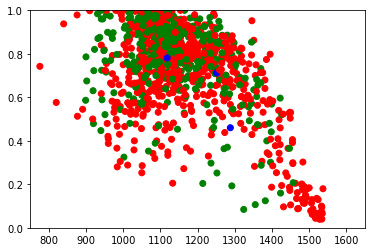

In [875]:
plt.scatter(data=df_select,x='SAT_AVG', y='ADM_RATE', c='CONTROL', cmap='viridis_r');
plt.xlim(750,1650)
plt.ylim(0,1);

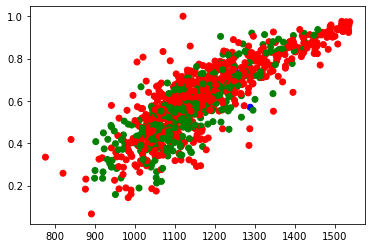

In [876]:
plt.scatter(data=df_select,x='SAT_AVG', y='C150_4', c='CONTROL', cmap='viridis_r');

### Data Wrangling 

First problem: many of the metrics are split out for four year and non-four year insitutions; or public, private, and for profit institutions. For example. retention rates are split ut by 4 year insitutions and less than 4 year instititions, with many NaNs across them. 

In [877]:
df['RET_FT4'].value_counts(dropna=False)

NaN       4474
1.0000      65
0.5000      46
0.6667      29
0.0000      26
          ... 
0.9603       1
0.7936       1
0.6794       1
0.5399       1
0.6022       1
Name: RET_FT4, Length: 1422, dtype: int64

In [878]:
df['RET_FTL4'].value_counts(dropna=False)

NaN       3519
1.0000     294
0.7500      76
0.6667      70
0.5000      70
          ... 
0.6806       1
0.5750       1
0.6862       1
0.7592       1
0.4077       1
Name: RET_FTL4, Length: 1369, dtype: int64

There are plenty of missing values. Let's see if we can put them into one column. 

In [879]:
df_ret = df[['RET_FT4','RET_FTL4']].copy()
df_ret.ffill(axis=1,inplace=True)
df_ret['RET_FTL4'].value_counts(dropna=False)

NaN       1450
1.0000     359
0.5000     116
0.7500     102
0.6667      99
          ... 
0.5094       1
0.7162       1
0.5970       1
0.6312       1
0.4077       1
Name: RET_FTL4, Length: 2365, dtype: int64

There are still missing values that will have to be dealt with, but many fewer than if we had not combined the metrics. Let's save this to our df. 

In [880]:
df['FULL_RET_FT'] = df_ret['RET_FTL4']

Now let's look at completion rates. There are several ways completion can be measured, but let's look at completion rates, 150% of time to expected graduation, pooled across two years. 

In [881]:
df_c150 = df[['C150_4_POOLED','C150_L4_POOLED']].copy()
df_c150.ffill(axis=1,inplace=True)
df_c150['C150_L4_POOLED'].value_counts(dropna=False)

NaN       1098
1.0000      56
0.5000      37
0.6667      34
0.8000      24
          ... 
0.3554       1
0.2688       1
0.2110       1
0.7208       1
0.9531       1
Name: C150_L4_POOLED, Length: 3540, dtype: int64

1,000 missing values isn't great, but it also isn't ruinuous. Let's see if any other metrics of completion give us fewer NaNs. 

In [882]:
df_c150 = df[['C150_4','C150_L4']].copy()
df_c150.ffill(axis=1,inplace=True)
df_c150['C150_L4'].value_counts(dropna=False)

NaN       1154
1.0000     147
0.5000      69
0.0000      67
0.6667      64
          ... 
0.6344       1
0.6619       1
0.2403       1
0.6465       1
0.7069       1
Name: C150_L4, Length: 3109, dtype: int64

In [883]:
df_c200 = df[['C200_4','C200_L4']].copy()
df_c200.ffill(axis=1,inplace=True)
df_c200['C200_L4'].value_counts(dropna=False)

NaN       1496
1.0000     132
0.5000      89
0.0000      76
0.6667      57
          ... 
0.4587       1
0.3141       1
0.7318       1
0.5115       1
0.9634       1
Name: C200_L4, Length: 2868, dtype: int64

In [884]:
df_d150 = df[['D150_4','D150_L4']].copy()
df_d150.ffill(axis=1,inplace=True)
df_d150['D150_L4'].value_counts(dropna=False)

NaN        1154
2.0          51
10.0         50
1.0          49
4.0          46
           ... 
2706.0        1
1175.0        1
525.0         1
1129.0        1
15671.0       1
Name: D150_L4, Length: 1435, dtype: int64

Looks like the pooled rate is the best. However, the pooled rate doesn't appear in all versions of the data for earlier years. Instead, we'll need to use the single year graduation rate for 150% of time to completion. Let's save it to our df. 

In [885]:
df['FULL_C150'] = df_c150['C150_L4']

Let's see if there's anything obvious about the schools missing data. 

In [886]:
df_missing_c150=df[df['FULL_C150'].isnull()]


In [887]:
df_missing_c150.head(20)

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRYP_NOPELL_NOTFIRSTTIME,OMENRAP_NOPELL_NOTFIRSTTIME,OMAWDP8_NOPELL_NOTFIRSTTIME,OMENRUP_NOPELL_NOTFIRSTTIME,OMACHT8_NOPELL_ALL,OMACHT8_NOPELL_FIRSTTIME,OMACHT8_NOPELL_NOTFIRSTTIME,ADDR,FULL_RET_FT,FULL_C150
7,100812,100800.0,1008.0,Athens State University,Athens,AL,35611,Southern Association of Colleges and Schools C...,www.athens.edu/,www.athens.edu/financial-aid/net-price-calcula...,...,0.0133,0.1433,0.6219,0.2216,677.0,0.0,677.0,300 N Beaty St,NaN,NaN
52,102395,2170600.0,21706.0,United States Sports Academy,Daphne,AL,36526-7055,Southern Association of Colleges and Schools C...,www.ussa.edu/,https://ussa.edu/admissions/net-price-calculator/,...,0.0133,0.4800,0.0533,0.4533,75.0,0.0,75.0,One Academy Drive,NaN,NaN
79,104665,2533200.0,25332.0,The School of Architecture,Paradise Valley,AZ,85253,Higher Learning Commission,https://tsoa.edu/,https://tsoa.edu/master-of-architecture/financ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6433 E. Doubletree Ranch Rd.,NaN,NaN
89,105367,193701.0,1937.0,Ottawa University-Phoenix,Phoenix,AZ,85021,NaN,www.ottawa.edu/,www.ottawa.edu/resources/netpricecalculator/np...,...,0.0072,0.0360,0.3813,0.5755,139.0,0.0,139.0,9414 North 25th Avenue,NaN,NaN
104,106263,110900.0,1109.0,University of Arkansas for Medical Sciences,Little Rock,AR,72205-7199,Higher Learning Commission,https://www.uams.edu/,https://studentfinancialservices.uams.edu/tuit...,...,0.0000,0.1030,0.8339,0.0631,301.0,0.0,301.0,4301 W Markham,NaN,NaN
133,107123,2330800.0,23308.0,Jefferson Regional School of Nursing,Pine Bluff,AR,71603,Accrediting Bureau of Health Education Schools,www.jrmc.org/,www.jrmc.org/schoolofnursing/Calculator/npcalc...,...,0.0000,0.0000,1.0000,0.0000,35.0,0.0,35.0,1600 West 40th Avenue,NaN,NaN
164,108269,3288300.0,32883.0,Academy of Chinese Culture and Health Sciences,Oakland,CA,94612,Accrediting Commission for Acupuncture and Ori...,www.acchs.edu/,www.acchs.edu/npcalc.htm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1600 Broadway, Ste. 200",NaN,NaN
168,108861,112000.0,1120.0,Berkeley School of Theology,Berkeley,CA,94704-3029,Commission on Accrediting of the Association o...,www.bst.edu/,https://www.bst.edu/prospective-students/tuiti...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2606 Dwight Way,NaN,NaN
169,108870,2222000.0,22220.0,American Film Institute Conservatory,Los Angeles,CA,90027-1625,Western Association of Schools and Colleges Se...,www.afi.com/,conservatory.afi.com/tuition-and-fees/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021 N Western Ave,NaN,NaN
187,110316,1215400.0,12154.0,California Institute of Integral Studies,San Francisco,CA,94103,Western Association of Schools and Colleges Se...,www.ciis.edu/,https://my.ciis.edu/ICS/Financial_Aid/Forms_an...,...,0.0000,0.0000,0.7632,0.2368,38.0,0.0,38.0,1453 Mission Street,NaN,NaN


Now, let's do the same for cost of tuition. 

In [888]:
df_cost = df[['COSTT4_A','COSTT4_P']].copy()
df_cost.ffill(axis=1,inplace=True)
df_cost['COSTT4_P'].value_counts(dropna=False)

C:\Users\Darcy\AppData\Local\Temp\ipykernel_14056\716245388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cost.ffill(axis=1,inplace=True)


NaN        1248
25041.0      11
21184.0       3
26984.0       3
20803.0       3
           ... 
8480.0        1
10194.0       1
24299.0       1
24404.0       1
21709.0       1
Name: COSTT4_P, Length: 4937, dtype: int64

In [889]:
df['FULL_COSTT'] = df_cost['COSTT4_P']

I'm pulling out the variables that I believe are most likely to be relevant to the question of graduation rates: type of insitution, information about full time faculty and their salaries and ratios, percent of student on federal loans or pell grants, student body racial makeup, admissions rate, total cost, debt after graduation for graduates and students who withdrew, and retention rate. The year and Unit ID flag are there to make matching across years possible.  

In [891]:
df_2021_clean = df[['UNITID','HIGHDEG','CONTROL','AVGFACSAL','PFTFAC','PCTPELL','MD_EARN_WNE_P10','UGDS','UGDS_MEN','UGDS_WHITE','UGDS_BLACK','UGDS_HISP',
'UGDS_ASIAN','UGDS_AIAN','UGDS_NHPI','UGDS_2MOR','UGDS_NRA','UGDS_UNKN','PCTFLOAN','GRAD_DEBT_MDN','WDRAW_DEBT_MDN','ICLEVEL','STUFACR','ADM_RATE','FULL_RET_FT','FULL_COSTT',
'FULL_C150']].copy()

In [892]:
df_2021_clean.head()

,UNITID,HIGHDEG,CONTROL,AVGFACSAL,PFTFAC,PCTPELL,MD_EARN_WNE_P10,UGDS,UGDS_MEN,UGDS_WHITE,...,UGDS_UNKN,PCTFLOAN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,ICLEVEL,STUFACR,ADM_RATE,FULL_RET_FT,FULL_COSTT,FULL_C150
0,100654,4,1,8779.0,0.6833,0.6853,39059.0,5098.0,0.4060,0.0184,...,0.0479,0.6552,31000,10500,1,18.0,0.7160,0.5797,21924.0,0.2807
1,100663,4,1,11590.0,0.7564,0.3253,50907.0,13284.0,0.3790,0.5297,...,0.0068,0.4401,22300,10204,1,19.0,0.8854,0.8392,26248.0,0.6245
2,100690,4,2,4672.0,0.7872,0.7852,37730.0,251.0,0.3147,0.2470,...,0.0120,0.8423,32189,10500,1,13.0,NaN,NaN,NaN,0.4444
3,100706,4,1,9820.0,0.6538,0.2377,56901.0,7358.0,0.5953,0.7196,...,0.0261,0.3578,20705,10185,1,19.0,0.7367,0.7899,24869.0,0.6072
4,100724,4,1,7701.0,0.6812,0.7205,34018.0,3495.0,0.3505,0.0152,...,0.0112,0.7637,31000,11000,1,13.0,0.9799,0.6436,21938.0,0.2843


Some rows use 'PrivacySuppressed' instead of NaNs to indicate that the data is not provided because the group is too small. For our purposes, though, this is the same as NaN, so we'll change it over. 

In [893]:
df_2021_clean = df_2021_clean.replace('PrivacySuppressed', np.nan)

In [894]:
df_2021_clean.isnull().sum()

UNITID                0
HIGHDEG               0
CONTROL               0
AVGFACSAL          2643
PFTFAC             3027
PCTPELL             805
MD_EARN_WNE_P10    1378
UGDS                774
UGDS_MEN            774
UGDS_WHITE          774
UGDS_BLACK          774
UGDS_HISP           774
UGDS_ASIAN          774
UGDS_AIAN           774
UGDS_NHPI           774
UGDS_2MOR           774
UGDS_NRA            774
UGDS_UNKN           774
PCTFLOAN            805
GRAD_DEBT_MDN      1514
WDRAW_DEBT_MDN     1666
ICLEVEL               0
STUFACR             785
ADM_RATE           4586
FULL_RET_FT        1450
FULL_COSTT         1248
FULL_C150          1154
dtype: int64

In [895]:
df_2021_clean.shape[0] - df_2021.dropna().shape[0]

6543

This is a lot of missing data! With only a handful of complete rows and only 3 variables that are complete, doing any kind of ML analysis is difficult. However, there is more than one year of data. I'll add a year tag, just with the first year of the data (since it covers the 2021-2022 school year) for simplicity's sake. 

In [896]:
df_2021_clean['YEAR'] = 2021

In [897]:
df_2021_clean.head()

,UNITID,HIGHDEG,CONTROL,AVGFACSAL,PFTFAC,PCTPELL,MD_EARN_WNE_P10,UGDS,UGDS_MEN,UGDS_WHITE,...,PCTFLOAN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,ICLEVEL,STUFACR,ADM_RATE,FULL_RET_FT,FULL_COSTT,FULL_C150,YEAR
0,100654,4,1,8779.0,0.6833,0.6853,39059.0,5098.0,0.4060,0.0184,...,0.6552,31000,10500,1,18.0,0.7160,0.5797,21924.0,0.2807,2021
1,100663,4,1,11590.0,0.7564,0.3253,50907.0,13284.0,0.3790,0.5297,...,0.4401,22300,10204,1,19.0,0.8854,0.8392,26248.0,0.6245,2021
2,100690,4,2,4672.0,0.7872,0.7852,37730.0,251.0,0.3147,0.2470,...,0.8423,32189,10500,1,13.0,NaN,NaN,NaN,0.4444,2021
3,100706,4,1,9820.0,0.6538,0.2377,56901.0,7358.0,0.5953,0.7196,...,0.3578,20705,10185,1,19.0,0.7367,0.7899,24869.0,0.6072,2021
4,100724,4,1,7701.0,0.6812,0.7205,34018.0,3495.0,0.3505,0.0152,...,0.7637,31000,11000,1,13.0,0.9799,0.6436,21938.0,0.2843,2021


Let's bring in the 2020 data and see what we can do with it. 

In [898]:
df_2020 = pd.read_csv("MERGED2020_21_PP.csv",low_memory=False)

In [899]:
df_2020.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP8_NOPELL_FIRSTTIME,OMENRUP_NOPELL_FIRSTTIME,OMENRYP_NOPELL_NOTFIRSTTIME,OMENRAP_NOPELL_NOTFIRSTTIME,OMAWDP8_NOPELL_NOTFIRSTTIME,OMENRUP_NOPELL_NOTFIRSTTIME,OMACHT8_NOPELL_ALL,OMACHT8_NOPELL_FIRSTTIME,OMACHT8_NOPELL_NOTFIRSTTIME,ADDR
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,0.3671,0.2995,0.0000,0.2273,0.5303,0.2424,273.0,207.0,66.0,NaN
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,0.6599,0.1054,0.0096,0.2407,0.5349,0.2149,2138.0,1091.0,1047.0,NaN
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,0.5000,0.5000,0.0000,0.0588,0.5588,0.3824,36.0,2.0,34.0,NaN
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,0.5933,0.0719,0.0162,0.2744,0.5812,0.1282,999.0,445.0,554.0,NaN
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,0.3588,0.3023,0.0000,0.3878,0.4490,0.1633,403.0,354.0,49.0,NaN


We'll do the same process of combining the metrics that are across two columns. 

In [900]:
df_c150 = df_2020[['C150_4','C150_L4']].copy()
df_c150.ffill(axis=1,inplace=True)
df_c150['C150_L4'].value_counts(dropna=False)

NaN       1225
1.0000     131
0.5000      86
0.0000      61
0.6667      58
          ... 
0.2656       1
0.7451       1
0.3980       1
0.3208       1
0.6620       1
Name: C150_L4, Length: 3106, dtype: int64

In [901]:
df_2020['FULL_C150'] = df_c150['C150_L4']

In [902]:
df_ret = df_2020[['RET_FT4','RET_FTL4']].copy()
df_ret.ffill(axis=1,inplace=True)
df_ret['RET_FTL4'].value_counts(dropna=False)

NaN       1504
1.0000     331
0.7500     100
0.6667      96
0.5000      87
          ... 
0.6494       1
0.7882       1
0.8573       1
0.5736       1
0.8691       1
Name: RET_FTL4, Length: 2417, dtype: int64

In [903]:
df_2020['FULL_RET_FT'] = df_ret['RET_FTL4']

In [904]:
df_cost = df_2020[['COSTT4_A','COSTT4_P']].copy()
df_cost.ffill(axis=1,inplace=True)
df_cost['COSTT4_P'].value_counts(dropna=False)

NaN        1286
28284.0      11
20086.0       4
11347.0       3
19527.0       3
           ... 
27310.0       1
14437.0       1
11971.0       1
13960.0       1
26948.0       1
Name: COSTT4_P, Length: 4982, dtype: int64

In [905]:
df_2020['FULL_COSTT'] = df_cost['COSTT4_P']

I'll again add a year tag. 

In [906]:
df_2020['YEAR'] = 2020

Next, I want to exclude data from schools not in the 2021-2022 data. There are some schools that have likely opened or closed between the years, but this will give us the best chance of getting complete info for the schools in the original data set without introducing more incomplete data. 

In [907]:
df_2020 = df_2020[df_2020['UNITID'].isin(df_2021['UNITID'])]

In [908]:
df_2020 = df_2020.replace('PrivacySuppressed', np.nan)

Let's pull out the relevant columns. 

In [909]:
df_2020_clean = df_2020[['UNITID','HIGHDEG','CONTROL','AVGFACSAL','PFTFAC','PCTPELL','MD_EARN_WNE_P10','UGDS','UGDS_MEN','UGDS_WHITE','UGDS_BLACK','UGDS_HISP',
'UGDS_ASIAN','UGDS_AIAN','UGDS_NHPI','UGDS_2MOR','UGDS_NRA','UGDS_UNKN','PCTFLOAN','GRAD_DEBT_MDN','WDRAW_DEBT_MDN','ICLEVEL','STUFACR','ADM_RATE','FULL_RET_FT','FULL_COSTT',
'FULL_C150', 'YEAR',]].copy()

In [910]:
df_2020_clean.head()

,UNITID,HIGHDEG,CONTROL,AVGFACSAL,PFTFAC,PCTPELL,MD_EARN_WNE_P10,UGDS,UGDS_MEN,UGDS_WHITE,...,PCTFLOAN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,ICLEVEL,STUFACR,ADM_RATE,FULL_RET_FT,FULL_COSTT,FULL_C150,YEAR
0,100654,4,1,7599.0,0.9960,0.7095,NaN,5090.0,0.3978,0.0159,...,0.7504,31000,10500,1,18.0,0.8965,0.5403,23445.0,0.2866,2020
1,100663,4,1,11380.0,0.7619,0.3397,NaN,13549.0,0.3816,0.5496,...,0.4688,22300,10204,1,20.0,0.8060,0.8640,25542.0,0.6122,2020
2,100690,4,2,4545.0,1.0000,0.7452,NaN,298.0,0.2886,0.2550,...,0.8493,32189,10500,1,13.0,NaN,0.5000,20100.0,0.2500,2020
3,100706,4,1,9697.0,0.6702,0.2403,NaN,7825.0,0.5891,0.7173,...,0.3855,20705,10185,1,19.0,0.7711,0.8180,24861.0,0.5714,2020
4,100724,4,1,7194.0,0.6797,0.7368,NaN,3603.0,0.3605,0.0167,...,0.7805,31000,11000,1,15.0,0.9888,0.6202,21892.0,0.3177,2020


In [911]:
df_2020_clean.isnull().sum()

UNITID                0
HIGHDEG               0
CONTROL               0
AVGFACSAL          2587
PFTFAC             2954
PCTPELL             780
MD_EARN_WNE_P10    6470
UGDS                758
UGDS_MEN            758
UGDS_WHITE          758
UGDS_BLACK          758
UGDS_HISP           758
UGDS_ASIAN          758
UGDS_AIAN           758
UGDS_NHPI           758
UGDS_2MOR           758
UGDS_NRA            758
UGDS_UNKN           758
PCTFLOAN            780
GRAD_DEBT_MDN      1477
WDRAW_DEBT_MDN     1629
ICLEVEL               0
STUFACR             765
ADM_RATE           4518
FULL_RET_FT        1392
FULL_COSTT         1181
FULL_C150          1128
YEAR                  0
dtype: int64

There is still plenty of missing datam but hopefully at least some of the schools reported for 2020-2021 that did not report for 2021-2022. 

Let's combine to check. Pandas has an incredible function, combine_first, that will combine the datasets with matching columns, where it will always pick the value from the first df, then check the second df and replace any NaNs in the first dataset with a value from the second. This is the perfect function for our purposes. We can keep all the most recent data, but pull in the previous year's data to fill in gaps. The year column will show all the cases where at least one value was pulled from 2020 instead of 2021.

In [912]:
two_year_df = df_2021_clean.combine_first(df_2020_clean)

Once they're combined, let's see the status of the nulls. 

In [913]:
two_year_df.isnull().sum()

UNITID                0
HIGHDEG               0
CONTROL               0
AVGFACSAL          1664
PFTFAC             2071
PCTPELL             595
MD_EARN_WNE_P10    1499
UGDS                584
UGDS_MEN            584
UGDS_WHITE          584
UGDS_BLACK          584
UGDS_HISP           584
UGDS_ASIAN          584
UGDS_AIAN           584
UGDS_NHPI           584
UGDS_2MOR           584
UGDS_NRA            584
UGDS_UNKN           584
PCTFLOAN            595
GRAD_DEBT_MDN       496
WDRAW_DEBT_MDN      577
ICLEVEL               0
STUFACR             586
ADM_RATE           3556
FULL_RET_FT         781
FULL_COSTT          698
FULL_C150           726
YEAR                  0
dtype: int64

In [914]:
two_year_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6676    False
6677    False
6678    False
6679    False
6680    False
Length: 6664, dtype: bool

In [915]:
two_year_df.shape[0] - two_year_df.dropna().shape[0]

4159

Wow! That got us over 2,000 additional complete rows. But there's still plenty with missing data. 
I have data from 1995-1996 onwards. I could likely repeat the process many times and eventually find data for all but the newest of schools. However, I'm going to cap the number of times I pull older data at 5 years. This should still surface mostly relevant data; a lot of these variables are likely pretty stable across time. The biggest concern is any variable about money; inflation changes prices by about 2% a year and college tuition, for example, often outpaces inflation. This limitation will impact the certainty of the results, but likely somewhat minimally. 

In [916]:
df_2019 = pd.read_csv("MERGED2019_20_PP.csv",low_memory=False)

In [917]:
df_c150 = df_2019[['C150_4','C150_L4']].copy()
df_c150.ffill(axis=1,inplace=True)
df_2019['FULL_C150'] = df_c150['C150_L4']

df_ret = df_2019[['RET_FT4','RET_FTL4']].copy()
df_ret.ffill(axis=1,inplace=True)
df_2019['FULL_RET_FT'] = df_ret['RET_FTL4']

df_cost = df_2019[['COSTT4_A','COSTT4_P']].copy()
df_cost.ffill(axis=1,inplace=True)
df_2019['FULL_COSTT'] = df_cost['COSTT4_P']

In [918]:
df_2019['YEAR'] = 2019

In [919]:
df_2019 = df_2019[df_2019['UNITID'].isin(df_2021['UNITID'])]

In [920]:
df_2019 = df_2019.replace('PrivacySuppressed', np.nan)

In [921]:
df_2019_clean = df_2019[['UNITID','HIGHDEG','CONTROL','AVGFACSAL','PFTFAC','PCTPELL','MD_EARN_WNE_P10','UGDS','UGDS_MEN','UGDS_WHITE','UGDS_BLACK','UGDS_HISP',
'UGDS_ASIAN','UGDS_AIAN','UGDS_NHPI','UGDS_2MOR','UGDS_NRA','UGDS_UNKN','PCTFLOAN','GRAD_DEBT_MDN','WDRAW_DEBT_MDN','ICLEVEL','STUFACR','ADM_RATE','FULL_RET_FT','FULL_COSTT',
'FULL_C150', 'YEAR',]].copy()

In [922]:
three_year_df = two_year_df.combine_first(df_2019_clean)

In [923]:
three_year_df.isnull().sum()

UNITID                0
HIGHDEG               0
CONTROL               0
AVGFACSAL          1237
PFTFAC             1608
PCTPELL             521
MD_EARN_WNE_P10     678
UGDS                512
UGDS_MEN            512
UGDS_WHITE          512
UGDS_BLACK          512
UGDS_HISP           512
UGDS_ASIAN          512
UGDS_AIAN           512
UGDS_NHPI           512
UGDS_2MOR           512
UGDS_NRA            512
UGDS_UNKN           512
PCTFLOAN            521
GRAD_DEBT_MDN       171
WDRAW_DEBT_MDN      237
ICLEVEL               0
STUFACR             513
ADM_RATE           2857
FULL_RET_FT         599
FULL_COSTT          565
FULL_C150           597
YEAR                  0
dtype: int64

In [924]:
three_year_df.shape[0] - three_year_df.dropna().shape[0]

3260

Another 1,000 complete rows! Let's keep going. 

In [925]:
df_2018 = pd.read_csv("MERGED2018_19_PP.csv",low_memory=False)

In [926]:
df_c150 = df_2018[['C150_4','C150_L4']].copy()
df_c150.ffill(axis=1,inplace=True)
df_2018['FULL_C150'] = df_c150['C150_L4']

df_ret = df_2018[['RET_FT4','RET_FTL4']].copy()
df_ret.ffill(axis=1,inplace=True)
df_2018['FULL_RET_FT'] = df_ret['RET_FTL4']

df_cost = df_2018[['COSTT4_A','COSTT4_P']].copy()
df_cost.ffill(axis=1,inplace=True)
df_2018['FULL_COSTT'] = df_cost['COSTT4_P']

In [927]:
df_2018['YEAR'] = 2018

In [928]:
df_2018 = df_2018.replace('PrivacySuppressed', np.nan)

In [929]:
df_2018 = df_2018[df_2018['UNITID'].isin(df_2021['UNITID'])]

In [930]:
df_2018_clean = df_2018[['UNITID','HIGHDEG','CONTROL','AVGFACSAL','PFTFAC','PCTPELL','MD_EARN_WNE_P10','UGDS','UGDS_MEN','UGDS_WHITE','UGDS_BLACK','UGDS_HISP',
'UGDS_ASIAN','UGDS_AIAN','UGDS_NHPI','UGDS_2MOR','UGDS_NRA','UGDS_UNKN','PCTFLOAN','GRAD_DEBT_MDN','WDRAW_DEBT_MDN','ICLEVEL','STUFACR','ADM_RATE','FULL_RET_FT','FULL_COSTT',
'FULL_C150', 'YEAR',]].copy()

In [931]:
four_year_df = three_year_df.combine_first(df_2018_clean)

In [932]:
four_year_df.isnull().sum()

UNITID                0
HIGHDEG               0
CONTROL               0
AVGFACSAL          1037
PFTFAC             1401
PCTPELL             471
MD_EARN_WNE_P10     416
UGDS                466
UGDS_MEN            466
UGDS_WHITE          466
UGDS_BLACK          466
UGDS_HISP           466
UGDS_ASIAN          466
UGDS_AIAN           466
UGDS_NHPI           466
UGDS_2MOR           466
UGDS_NRA            466
UGDS_UNKN           466
PCTFLOAN            471
GRAD_DEBT_MDN        93
WDRAW_DEBT_MDN      124
ICLEVEL               0
STUFACR             466
ADM_RATE           2451
FULL_RET_FT         542
FULL_COSTT          517
FULL_C150           572
YEAR                  0
dtype: int64

In [933]:
four_year_df.shape[0] - four_year_df.dropna().shape[0]

2805

Not a huge change, another 400 complete rows, but every complete row will strengthen the analysis. 

In [934]:
df_2017 = pd.read_csv("MERGED2017_18_PP.csv",low_memory=False)

In [935]:
df_c150 = df_2017[['C150_4','C150_L4']].copy()
df_c150.ffill(axis=1,inplace=True)
df_2017['FULL_C150'] = df_c150['C150_L4']

df_ret = df_2017[['RET_FT4','RET_FTL4']].copy()
df_ret.ffill(axis=1,inplace=True)
df_2017['FULL_RET_FT'] = df_ret['RET_FTL4']

df_cost = df_2017[['COSTT4_A','COSTT4_P']].copy()
df_cost.ffill(axis=1,inplace=True)
df_2017['FULL_COSTT'] = df_cost['COSTT4_P']

In [936]:
df_2017['YEAR'] = 2017

In [937]:
df_2017 = df_2017[df_2017['UNITID'].isin(df_2021['UNITID'])]

In [938]:
df_2017 = df_2017.replace('PrivacySuppressed', np.nan)

In [939]:
df_2017_clean = df_2017[['UNITID','HIGHDEG','CONTROL','AVGFACSAL','PFTFAC','PCTPELL','MD_EARN_WNE_P10','UGDS','UGDS_MEN','UGDS_WHITE','UGDS_BLACK','UGDS_HISP',
'UGDS_ASIAN','UGDS_AIAN','UGDS_NHPI','UGDS_2MOR','UGDS_NRA','UGDS_UNKN','PCTFLOAN','GRAD_DEBT_MDN','WDRAW_DEBT_MDN','ICLEVEL','STUFACR','ADM_RATE','FULL_RET_FT','FULL_COSTT',
'FULL_C150', 'YEAR',]].copy()

In [940]:
five_year_df = four_year_df.combine_first(df_2017_clean)

In [941]:
five_year_df.isnull().sum()

UNITID                0
HIGHDEG               0
CONTROL               0
AVGFACSAL           997
PFTFAC             1352
PCTPELL             415
MD_EARN_WNE_P10     650
UGDS                410
UGDS_MEN            410
UGDS_WHITE          410
UGDS_BLACK          410
UGDS_HISP           410
UGDS_ASIAN          410
UGDS_AIAN           410
UGDS_NHPI           410
UGDS_2MOR           410
UGDS_NRA            410
UGDS_UNKN           410
PCTFLOAN            415
GRAD_DEBT_MDN        57
WDRAW_DEBT_MDN       76
ICLEVEL               0
STUFACR             411
ADM_RATE           2268
FULL_RET_FT         496
FULL_COSTT          475
FULL_C150           584
YEAR                  0
dtype: int64

Since this is the final year I'm planning to pull, it's time to look at where we are with various variables. The most frequently missing variables are admissions rate, faculty salary, and percent full time faculty. Admissions rate feels important for graduation rate; selective colleges likely have higher graduation rates because selective admissions filters out students that are less likely to graduate. But given how often it's missing, it's likely holding back the number of complete rows by quite a bit. 

In [942]:
five_year_df.shape[0] - five_year_df.dropna().shape[0]

2655

Still almost 40% of the data is missing something, and in an ideal world, all 2,268 of those schools missing admissions rate will otherwise be complete. Let's drop admissions rate and see. 

In [943]:
five_year_df.drop(['ADM_RATE'],axis=1,inplace=True)

In [944]:
five_year_df.isnull().sum()

UNITID                0
HIGHDEG               0
CONTROL               0
AVGFACSAL           997
PFTFAC             1352
PCTPELL             415
MD_EARN_WNE_P10     650
UGDS                410
UGDS_MEN            410
UGDS_WHITE          410
UGDS_BLACK          410
UGDS_HISP           410
UGDS_ASIAN          410
UGDS_AIAN           410
UGDS_NHPI           410
UGDS_2MOR           410
UGDS_NRA            410
UGDS_UNKN           410
PCTFLOAN            415
GRAD_DEBT_MDN        57
WDRAW_DEBT_MDN       76
ICLEVEL               0
STUFACR             411
FULL_RET_FT         496
FULL_COSTT          475
FULL_C150           584
YEAR                  0
dtype: int64

In [945]:
five_year_df.shape[0] - five_year_df.dropna().shape[0]

1651

Well, things look a lot better. At this point, about 25% of the schools are still missing at least one value, despite my best efforts. However, that percent is likely low enough that I can still do complete case analysis and drop those schools, while still getting a reasonable sample that can help us explain graduation rates. Let's drop those rows. But first, I'll make a new dataframe for the rows with missing data. 

In [946]:
null_rows = five_year_df[five_year_df.isnull().any(axis=1)]

# Create a new dataframe with the null rows
five_year_df_nulls = pd.DataFrame(null_rows)

In [947]:
five_year_df.dropna(inplace=True)

In [948]:
five_year_df

,UNITID,HIGHDEG,CONTROL,AVGFACSAL,PFTFAC,PCTPELL,MD_EARN_WNE_P10,UGDS,UGDS_MEN,UGDS_WHITE,...,UGDS_UNKN,PCTFLOAN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,ICLEVEL,STUFACR,FULL_RET_FT,FULL_COSTT,FULL_C150,YEAR
0,100654,4,1,8779.0,0.6833,0.6853,39059.0,5098.0,0.4060,0.0184,...,0.0479,0.6552,31000,10500,1,18.0,0.5797,21924.0,0.2807,2021
1,100663,4,1,11590.0,0.7564,0.3253,50907.0,13284.0,0.3790,0.5297,...,0.0068,0.4401,22300,10204,1,19.0,0.8392,26248.0,0.6245,2021
2,100690,4,2,4672.0,0.7872,0.7852,37730.0,251.0,0.3147,0.2470,...,0.0120,0.8423,32189,10500,1,13.0,0.5000,20100.0,0.4444,2021
3,100706,4,1,9820.0,0.6538,0.2377,56901.0,7358.0,0.5953,0.7196,...,0.0261,0.3578,20705,10185,1,19.0,0.7899,24869.0,0.6072,2021
4,100724,4,1,7701.0,0.6812,0.7205,34018.0,3495.0,0.3505,0.0152,...,0.0112,0.7637,31000,11000,1,13.0,0.6436,21938.0,0.2843,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6511,49010601,0,2,3038.0,0.6047,0.2217,39051.0,1748.0,0.9834,0.8043,...,0.0892,0.1531,20000,7660,1,50.0,0.5970,17883.0,0.3433,2021
6531,49576713,0,1,2757.0,0.3571,0.4412,61185.0,97.0,0.5361,0.7629,...,0.0206,0.3431,25000,9500,1,15.0,0.7083,14240.0,0.4884,2021
6584,45891902,0,3,3441.0,0.4211,0.5898,37168.0,336.0,0.6131,0.6964,...,0.0238,0.4847,40621,12592,1,9.0,0.6087,19145.0,0.3371,2020
6587,45891905,0,3,4671.0,0.0197,0.1199,42990.0,441.0,0.2086,0.3401,...,0.0272,0.1608,40621,12592,1,8.0,0.6500,27608.0,0.9811,2020


In [949]:
five_year_df.isnull().sum()

UNITID             0
HIGHDEG            0
CONTROL            0
AVGFACSAL          0
PFTFAC             0
PCTPELL            0
MD_EARN_WNE_P10    0
UGDS               0
UGDS_MEN           0
UGDS_WHITE         0
UGDS_BLACK         0
UGDS_HISP          0
UGDS_ASIAN         0
UGDS_AIAN          0
UGDS_NHPI          0
UGDS_2MOR          0
UGDS_NRA           0
UGDS_UNKN          0
PCTFLOAN           0
GRAD_DEBT_MDN      0
WDRAW_DEBT_MDN     0
ICLEVEL            0
STUFACR            0
FULL_RET_FT        0
FULL_COSTT         0
FULL_C150          0
YEAR               0
dtype: int64

You love to see it. Now, we have complete data for every variable and outcome. Let's map some of the variables that look like numbers but are actually categorical. 

In [950]:
mapping = {1: 'Public', 2: 'Private nonprofit', 3: 'Private for profit'}
five_year_df['CONTROL'] = five_year_df['CONTROL'].map(mapping)

In [951]:
mapping = {1: "4-year", 2:"2-year", 3: "Less-than-2-year"}
five_year_df['ICLEVEL'] = five_year_df['ICLEVEL'].map(mapping)

In [952]:
mapping = {0:"Non-degree-granting", 1:"Certificate degree", 2:"Associate degree", 3:"Bachelor's degree", 4:"Graduate degree"}
five_year_df['HIGHDEG'] = five_year_df['HIGHDEG'].map(mapping)

In [953]:
five_year_df

,UNITID,HIGHDEG,CONTROL,AVGFACSAL,PFTFAC,PCTPELL,MD_EARN_WNE_P10,UGDS,UGDS_MEN,UGDS_WHITE,...,UGDS_UNKN,PCTFLOAN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,ICLEVEL,STUFACR,FULL_RET_FT,FULL_COSTT,FULL_C150,YEAR
0,100654,Graduate degree,Public,8779.0,0.6833,0.6853,39059.0,5098.0,0.4060,0.0184,...,0.0479,0.6552,31000,10500,4-year,18.0,0.5797,21924.0,0.2807,2021
1,100663,Graduate degree,Public,11590.0,0.7564,0.3253,50907.0,13284.0,0.3790,0.5297,...,0.0068,0.4401,22300,10204,4-year,19.0,0.8392,26248.0,0.6245,2021
2,100690,Graduate degree,Private nonprofit,4672.0,0.7872,0.7852,37730.0,251.0,0.3147,0.2470,...,0.0120,0.8423,32189,10500,4-year,13.0,0.5000,20100.0,0.4444,2021
3,100706,Graduate degree,Public,9820.0,0.6538,0.2377,56901.0,7358.0,0.5953,0.7196,...,0.0261,0.3578,20705,10185,4-year,19.0,0.7899,24869.0,0.6072,2021
4,100724,Graduate degree,Public,7701.0,0.6812,0.7205,34018.0,3495.0,0.3505,0.0152,...,0.0112,0.7637,31000,11000,4-year,13.0,0.6436,21938.0,0.2843,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6511,49010601,Non-degree-granting,Private nonprofit,3038.0,0.6047,0.2217,39051.0,1748.0,0.9834,0.8043,...,0.0892,0.1531,20000,7660,4-year,50.0,0.5970,17883.0,0.3433,2021
6531,49576713,Non-degree-granting,Public,2757.0,0.3571,0.4412,61185.0,97.0,0.5361,0.7629,...,0.0206,0.3431,25000,9500,4-year,15.0,0.7083,14240.0,0.4884,2021
6584,45891902,Non-degree-granting,Private for profit,3441.0,0.4211,0.5898,37168.0,336.0,0.6131,0.6964,...,0.0238,0.4847,40621,12592,4-year,9.0,0.6087,19145.0,0.3371,2020
6587,45891905,Non-degree-granting,Private for profit,4671.0,0.0197,0.1199,42990.0,441.0,0.2086,0.3401,...,0.0272,0.1608,40621,12592,4-year,8.0,0.6500,27608.0,0.9811,2020


In [954]:
clean_df = pd.get_dummies(five_year_df, columns=['CONTROL','ICLEVEL','HIGHDEG'])

In [955]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5355 entries, 0 to 6643
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UNITID                       5355 non-null   int64  
 1   AVGFACSAL                    5355 non-null   float64
 2   PFTFAC                       5355 non-null   float64
 3   PCTPELL                      5355 non-null   float64
 4   MD_EARN_WNE_P10              5355 non-null   float64
 5   UGDS                         5355 non-null   float64
 6   UGDS_MEN                     5355 non-null   float64
 7   UGDS_WHITE                   5355 non-null   float64
 8   UGDS_BLACK                   5355 non-null   float64
 9   UGDS_HISP                    5355 non-null   float64
 10  UGDS_ASIAN                   5355 non-null   float64
 11  UGDS_AIAN                    5355 non-null   float64
 12  UGDS_NHPI                    5355 non-null   float64
 13  UGDS_2MOR         

Graduate debt and withdrawn student debt are objects, likely because they used to contain "PrivacySupressed" values. But now that we have complete data, those can be cast as floats. 

In [956]:
clean_df['GRAD_DEBT_MDN'] = clean_df['GRAD_DEBT_MDN'].astype(np.float64)

In [957]:
clean_df['WDRAW_DEBT_MDN'] = clean_df['WDRAW_DEBT_MDN'].astype(np.float64)

In [958]:
print(clean_df.columns.tolist())

['UNITID', 'AVGFACSAL', 'PFTFAC', 'PCTPELL', 'MD_EARN_WNE_P10', 'UGDS', 'UGDS_MEN', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'PCTFLOAN', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN', 'STUFACR', 'FULL_RET_FT', 'FULL_COSTT', 'FULL_C150', 'YEAR', 'CONTROL_Private for profit', 'CONTROL_Private nonprofit', 'CONTROL_Public', 'ICLEVEL_2-year', 'ICLEVEL_4-year', 'ICLEVEL_Less-than-2-year', 'HIGHDEG_Associate degree', "HIGHDEG_Bachelor's degree", 'HIGHDEG_Certificate degree', 'HIGHDEG_Graduate degree', 'HIGHDEG_Non-degree-granting']


Time to divide our variables from our outcome and drop the unneeded columns. 

In [959]:
X = clean_df[['AVGFACSAL','FULL_COSTT', 'FULL_RET_FT', 'GRAD_DEBT_MDN', 'MD_EARN_WNE_P10', 'PCTFLOAN', 'PCTPELL', 'PFTFAC', 'STUFACR', 'UGDS', 'UGDS_2MOR', 'UGDS_AIAN', 'UGDS_ASIAN', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_MEN', 'UGDS_NHPI', 'UGDS_NRA', 'UGDS_UNKN', 'UGDS_WHITE', 'WDRAW_DEBT_MDN', 'CONTROL_Private for profit', 'CONTROL_Private nonprofit', 'CONTROL_Public', 'ICLEVEL_2-year', 'ICLEVEL_4-year', 'ICLEVEL_Less-than-2-year', 'HIGHDEG_Associate degree', "HIGHDEG_Bachelor's degree", 'HIGHDEG_Certificate degree', 'HIGHDEG_Graduate degree', 'HIGHDEG_Non-degree-granting']].copy()
y = clean_df["FULL_C150"].copy()

Let's train a linear model! 

In [960]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression() 

#Fit 
lm_model.fit(X_train, y_train) 

#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.4156821084126696 on 1607 values.'

So this model can explain 41% of the variation in graduation rates based on the provided variables. Let's see what variables are driving the biggest changes in the graduation rates. 

In [961]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [962]:
coef_df = coef_weights(lm_model.coef_, X_train)
coef_df.head(25)

,est_int,coefs,abs_coefs
10,UGDS_2MOR,-0.289669,0.289669
2,FULL_RET_FT,0.283236,0.283236
11,UGDS_AIAN,-0.179062,0.179062
18,UGDS_UNKN,-0.150591,0.150591
12,UGDS_ASIAN,0.143123,0.143123
13,UGDS_BLACK,-0.120009,0.120009
16,UGDS_NHPI,-0.104950,0.104950
29,HIGHDEG_Certificate degree,0.090592,0.090592
5,PCTFLOAN,0.078080,0.078080
27,HIGHDEG_Associate degree,-0.076889,0.076889


There are some really interesting coefficient weights here. The representation of students of two or more races has a large negative impact on the graduation rates, as do several other racial groups (while higher proportions of Asian students increase graduation rates). This is likely related to the many failings of our education system before these students reach postsecondary education that prevent them from being successful, not anything intrinsic to racial differences in ability. 

Retention rates are the second highest factor, which makes sense: schools that retain students year to year can likely get more students to graduation. 

The type of degree offered also makes a difference. Certificate and other non-degree granting institutions have higher graduation rates, while associate and bachelor's institutions have lower graduation rates. This is likely because non-degree and certificate programs are shorter; it's easier to graduate if the program is one year than it is if it's two years. 

The percent of students with loans has a positive impact on graduation rates, while Pell grant students have a slightly negative impact. More fulltime faculty has a slightly positive impact, while faculty ratio has almost no impact. 

Graduation rate can only vary between 0% and 100%, so all our predictions are hopefully within that range. Let's check. 

In [963]:
y_test_preds

array([0.75018114, 0.57288292, 0.64919938, ..., 0.60088982, 0.77231799,
       0.55794312])

In [964]:
count = np.count_nonzero((y_test_preds < 0) | (y_test_preds > 1))
print(count)

0


It looks like every prediction is in that range! That gives another source of information that our model is a reasonable one for explaining differences in graduation rates. 

However, linear models aren't the only game in town. Perhaps a random forest would result in a stronger model. Let's try it out using a radnom forest regressor. 

In [965]:
clf=RFR(n_estimators=200,max_depth=20,random_state=42)

In [966]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [967]:
clf.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [968]:
y_prediction=clf.predict(X_test)

In [969]:
rsquared_score = r2_score(y_test, y_prediction)
length_y_test = len(y_test)

print("The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test))

MSE_score = mean_squared_error(y_test, y_prediction)
print("The mean squared error score for your model was {} on {} values.".format(MSE_score, length_y_test))

The r-squared score for your model was 0.521264662458044 on 1607 values.
The mean squared error score for your model was 0.025352346439646425 on 1607 values.


Excellent! This r-squared is an improvement over the linear model. Let's try an elastic net model as well. 

In [970]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [971]:
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5)

elastic_net.fit(X_train, y_train)

y_pred1 = elastic_net.predict(X_test)

r2 = r2_score(y_test, y_pred1)
length_y_test = len(y_test)

print("The r-squared score for your model was {} on {} values.".format(r2, length_y_test))
MSE_score = mean_squared_error(y_test, y_pred1)
print("The mean squared error score for your model was {} on {} values.".format(MSE_score, length_y_test))

ElasticNet(alpha=0.5)
The r-squared score for your model was 0.1539887546041272 on 1607 values.
The mean squared error score for your model was 0.044802145367497916 on 1607 values.


The r-squared is much lower, but an elastic net model can be tuned. Let's set up a pipeline to perform a grid search for the best parameter set. 

In [972]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('elastic_net', ElasticNet())  # Model
])

# Define the parameter grid for grid search
param_grid = {
    'elastic_net__alpha': [0.1, 0.5, 1.0],  # List of alpha values to try
    'elastic_net__l1_ratio': [0.2, 0.5, 0.8]  # List of l1_ratio values to try
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)
best_score = grid_search.best_score_

# Fit the model with the best parameters on the entire training data
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict the target variable for the test data using the best model
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
length_y_test = len(y_test)

print("The r-squared score for your model was {} on {} values.".format(r2, length_y_test))
MSE_score = mean_squared_error(y_test, y_pred)
print("The mean squared error score for your model was {} on {} values.".format(MSE_score, length_y_test))

Best Parameters:  {'elastic_net__alpha': 0.1, 'elastic_net__l1_ratio': 0.2}
The r-squared score for your model was 0.34362122658032157 on 1607 values.
The mean squared error score for your model was 0.034759794722501534 on 1607 values.


It looks like the random forest is still the best model, even after tuning. 

In [973]:
five_year_df_nulls.head()

,UNITID,HIGHDEG,CONTROL,AVGFACSAL,PFTFAC,PCTPELL,MD_EARN_WNE_P10,UGDS,UGDS_MEN,UGDS_WHITE,...,UGDS_UNKN,PCTFLOAN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,ICLEVEL,STUFACR,FULL_RET_FT,FULL_COSTT,FULL_C150,YEAR
7,100812,4,1,8834.0,0.4554,0.4036,45311.0,2511.0,0.2951,0.7634,...,0.0191,0.4550,18051,11883,1,14.0,NaN,NaN,NaN,2021
17,101277,1,3,6236.0,0.4746,0.6538,NaN,57.0,0.0351,0.8421,...,0.0000,0.6538,9500,3904,3,14.0,0.8409,16895.0,0.7333,2021
24,101462,2,1,6085.0,0.5000,0.4521,28569.0,688.0,0.4186,0.2253,...,0.0015,0.0000,NaN,NaN,2,12.0,0.4127,11544.0,0.1351,2021
25,101471,1,1,5888.0,1.0000,0.1805,NaN,400.0,0.7575,0.4350,...,0.0000,0.0000,NaN,NaN,2,9.0,0.6000,6084.0,0.2167,2021
292,114947,1,2,7909.0,0.9355,0.1168,50371.0,104.0,0.4519,0.5385,...,0.0769,0.0949,NaN,NaN,3,4.0,NaN,39502.0,0.9058,2021


In [1004]:
filtered_df = five_year_df_nulls.dropna(subset=five_year_df_nulls.columns.difference(['FULL_C150'])).copy()

In [1005]:
filtered_df.isnull().sum()

UNITID              0
HIGHDEG             0
CONTROL             0
AVGFACSAL           0
PFTFAC              0
PCTPELL             0
MD_EARN_WNE_P10     0
UGDS                0
UGDS_MEN            0
UGDS_WHITE          0
UGDS_BLACK          0
UGDS_HISP           0
UGDS_ASIAN          0
UGDS_AIAN           0
UGDS_NHPI           0
UGDS_2MOR           0
UGDS_NRA            0
UGDS_UNKN           0
PCTFLOAN            0
GRAD_DEBT_MDN       0
WDRAW_DEBT_MDN      0
ICLEVEL             0
STUFACR             0
FULL_RET_FT         0
FULL_COSTT          0
FULL_C150          27
YEAR                0
dtype: int64

In [1006]:
mapping1 = {0:"Non-degree-granting", 1:"Certificate degree", 2:"Associate degree", 3:"Bachelor's degree", 4:"Graduate degree"}
filtered_df['HIGHDEG'] = filtered_df['HIGHDEG'].map(mapping1)
mapping2 = {1: 'Public', 2: 'Private nonprofit', 3: 'Private for profit'}
filtered_df['CONTROL'] = filtered_df['CONTROL'].map(mapping2)
mapping3 = {1: "4-year", 2:"2-year", 3: "Less-than-2-year"}
filtered_df['ICLEVEL'] = filtered_df['ICLEVEL'].map(mapping3)
clean_filtered_df = pd.get_dummies(filtered_df, columns=['CONTROL','ICLEVEL','HIGHDEG'])
clean_filtered_df['GRAD_DEBT_MDN'] = clean_filtered_df['GRAD_DEBT_MDN'].astype(np.float64)
clean_filtered_df['WDRAW_DEBT_MDN'] = clean_filtered_df['WDRAW_DEBT_MDN'].astype(np.float64)


In [1007]:
filtered_df.head()


,UNITID,HIGHDEG,CONTROL,AVGFACSAL,PFTFAC,PCTPELL,MD_EARN_WNE_P10,UGDS,UGDS_MEN,UGDS_WHITE,...,UGDS_UNKN,PCTFLOAN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,ICLEVEL,STUFACR,FULL_RET_FT,FULL_COSTT,FULL_C150,YEAR
6021,496894,Certificate degree,Private for profit,5971.0,0.0076,0.5833,58068.0,13.0,0.0000,0.1538,...,0.0000,0.5833,6333,4750,Less-than-2-year,1.0,0.0000,13271.0,NaN,2021
6102,13017409,Non-degree-granting,Private for profit,6743.0,0.3125,0.4267,42787.0,85.0,0.1059,0.2588,...,0.0000,0.8667,12000,5500,Less-than-2-year,20.0,0.9140,16805.0,NaN,2021
6131,14736903,Non-degree-granting,Private nonprofit,2520.0,0.7308,0.8389,47183.0,204.0,0.0000,1.0000,...,0.0000,0.0000,18149,8750,4-year,12.0,1.0000,13800.0,NaN,2021
6167,16855501,Non-degree-granting,Private for profit,6617.0,0.2317,0.4359,20834.0,93.0,0.0323,0.4086,...,0.0000,0.6026,9377,3958,Less-than-2-year,12.0,0.6667,18800.0,NaN,2021
6183,17355901,Non-degree-granting,Public,5052.0,0.5000,0.5345,42689.0,41.0,0.2195,0.0000,...,0.0488,0.0000,12000,7000,2-year,3.0,0.7297,21464.0,NaN,2021


In [1008]:
clean_filtered_df['HIGHDEG_Associate degree'] = 0
clean_filtered_df[ "HIGHDEG_Bachelor's degree"] = 0
clean_filtered_df[ 'HIGHDEG_Graduate degree'] = 0

In [1009]:
clean_filtered_df

,UNITID,AVGFACSAL,PFTFAC,PCTPELL,MD_EARN_WNE_P10,UGDS,UGDS_MEN,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,...,CONTROL_Private nonprofit,CONTROL_Public,ICLEVEL_2-year,ICLEVEL_4-year,ICLEVEL_Less-than-2-year,HIGHDEG_Certificate degree,HIGHDEG_Non-degree-granting,HIGHDEG_Associate degree,HIGHDEG_Bachelor's degree,HIGHDEG_Graduate degree
6021,496894,5971.0,0.0076,0.5833,58068.0,13.0,0.0000,0.1538,0.2308,0.5385,...,0,0,0,0,1,1,0,0,0,0
6102,13017409,6743.0,0.3125,0.4267,42787.0,85.0,0.1059,0.2588,0.1882,0.3882,...,0,0,0,0,1,0,1,0,0,0
6131,14736903,2520.0,0.7308,0.8389,47183.0,204.0,0.0000,1.0000,0.0000,0.0000,...,1,0,0,1,0,0,1,0,0,0
6167,16855501,6617.0,0.2317,0.4359,20834.0,93.0,0.0323,0.4086,0.0430,0.4301,...,0,0,0,0,1,0,1,0,0,0
6183,17355901,5052.0,0.5000,0.5345,42689.0,41.0,0.2195,0.0000,0.0000,0.9512,...,0,1,1,0,0,0,1,0,0,0
6221,17706522,7695.0,0.0951,0.5317,44642.0,96.0,0.0625,0.7292,0.0833,0.1563,...,1,0,0,1,0,0,1,0,0,0
6223,17706524,8894.0,0.6957,0.8142,44642.0,200.0,0.1350,0.1350,0.4700,0.3400,...,1,0,0,1,0,0,1,0,0,0
6228,17706532,2667.0,1.0000,0.9103,44642.0,94.0,1.0000,1.0000,0.0000,0.0000,...,1,0,0,1,0,0,1,0,0,0
6231,17706535,7597.0,0.4545,0.9271,44642.0,54.0,0.0926,0.0000,0.9815,0.0000,...,1,0,0,1,0,0,1,0,0,0
6285,21287802,6124.0,0.7059,0.4114,41418.0,129.0,0.3411,0.0388,0.0155,0.0233,...,0,1,1,0,0,0,1,0,0,0


In [1010]:
filtered_X = clean_filtered_df[['AVGFACSAL','FULL_COSTT', 'FULL_RET_FT', 'GRAD_DEBT_MDN', 'MD_EARN_WNE_P10', 'PCTFLOAN', 'PCTPELL', 'PFTFAC', 'STUFACR', 'UGDS', 'UGDS_2MOR', 'UGDS_AIAN', 'UGDS_ASIAN', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_MEN', 'UGDS_NHPI', 'UGDS_NRA', 'UGDS_UNKN', 'UGDS_WHITE', 'WDRAW_DEBT_MDN', 'CONTROL_Private for profit', 'CONTROL_Private nonprofit', 'CONTROL_Public', 'ICLEVEL_2-year', 'ICLEVEL_4-year', 'ICLEVEL_Less-than-2-year', 'HIGHDEG_Certificate degree',  'HIGHDEG_Non-degree-granting','HIGHDEG_Associate degree', "HIGHDEG_Bachelor's degree", 'HIGHDEG_Graduate degree']].copy()

In [1011]:
new_predictions = clf.predict(filtered_X)

C:\Users\Darcy\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [1013]:
clean_filtered_df['Predictions'] = new_predictions

In [1015]:
clean_filtered_df


,UNITID,AVGFACSAL,PFTFAC,PCTPELL,MD_EARN_WNE_P10,UGDS,UGDS_MEN,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,...,CONTROL_Public,ICLEVEL_2-year,ICLEVEL_4-year,ICLEVEL_Less-than-2-year,HIGHDEG_Certificate degree,HIGHDEG_Non-degree-granting,HIGHDEG_Associate degree,HIGHDEG_Bachelor's degree,HIGHDEG_Graduate degree,Predictions
6021,496894,5971.0,0.0076,0.5833,58068.0,13.0,0.0000,0.1538,0.2308,0.5385,...,0,0,0,1,1,0,0,0,0,0.580487
6102,13017409,6743.0,0.3125,0.4267,42787.0,85.0,0.1059,0.2588,0.1882,0.3882,...,0,0,0,1,0,1,0,0,0,0.608067
6131,14736903,2520.0,0.7308,0.8389,47183.0,204.0,0.0000,1.0000,0.0000,0.0000,...,0,0,1,0,0,1,0,0,0,0.551826
6167,16855501,6617.0,0.2317,0.4359,20834.0,93.0,0.0323,0.4086,0.0430,0.4301,...,0,0,0,1,0,1,0,0,0,0.663577
6183,17355901,5052.0,0.5000,0.5345,42689.0,41.0,0.2195,0.0000,0.0000,0.9512,...,1,1,0,0,0,1,0,0,0,0.581240
6221,17706522,7695.0,0.0951,0.5317,44642.0,96.0,0.0625,0.7292,0.0833,0.1563,...,0,0,1,0,0,1,0,0,0,0.515525
6223,17706524,8894.0,0.6957,0.8142,44642.0,200.0,0.1350,0.1350,0.4700,0.3400,...,0,0,1,0,0,1,0,0,0,0.394069
6228,17706532,2667.0,1.0000,0.9103,44642.0,94.0,1.0000,1.0000,0.0000,0.0000,...,0,0,1,0,0,1,0,0,0,0.305949
6231,17706535,7597.0,0.4545,0.9271,44642.0,54.0,0.0926,0.0000,0.9815,0.0000,...,0,0,1,0,0,1,0,0,0,0.374895
6285,21287802,6124.0,0.7059,0.4114,41418.0,129.0,0.3411,0.0388,0.0155,0.0233,...,1,1,0,0,0,1,0,0,0,0.201085
